<h1>MAKP8IP3 Summary</h1>
<p>This notebook provides a summary of the phenopackets created by the three other notebooks in this folder.</p>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None) # show entire column contents, important!
from collections import defaultdict
from IPython.display import HTML, display
import hpotk
from hpotk.ontology import Ontology
from hpotk.ontology.load.obographs import load_ontology
from pyphetools.visualization import *
import importlib.metadata
__version__ = importlib.metadata.version("pyphetools")
print(f"Using pyphetools version {__version__}")

Using pyphetools version 0.9.78


In [2]:
hpo: Ontology = load_ontology("../hp.json")

In [3]:
ingestor = PhenopacketIngestor(indir="phenopackets")
ppkt_d = ingestor.get_phenopacket_dictionary()

[pyphetools] Ingested 20 GA4GH phenopackets.


<h2>Frequency of HPO terms per publication</h2>
<p>The following table shows the counts of patients directly annotated to HPO terms per publication. Onely terms with more than one toal annotation are shown.</p>

In [4]:
detailed_table = DetailedSupplTable(patient_d=ppkt_d, hp_ontology=hpo)

In [5]:
display(HTML(detailed_table.get_html_table_by_pmid(min_count=1)))

HPO term,PMID:30612693,PMID:30945334,PMID:37684057,PMID:34321325
Global developmental delay (HP:0001263),13/13 (100.0%),5/5 (100.0%),1/1 (100.0%),0/1 (0.0%)
Hypotonia (HP:0001252),9/13 (69.2%),2/5 (40.0%),0/1 (0.0%),0/1 (0.0%)
Thin corpus callosum (HP:0033725),3/13 (23.1%),5/5 (100.0%),1/1 (100.0%),0/1 (0.0%)
"Intellectual disability, moderate (HP:0002342)",7/13 (53.8%),0/5 (0.0%),0/1 (0.0%),0/1 (0.0%)
Intellectual disability (HP:0001249),0/13 (0.0%),5/5 (100.0%),0/1 (0.0%),1/1 (100.0%)
Spastic diplegia (HP:0001264),1/13 (7.7%),4/5 (80.0%),1/1 (100.0%),0/1 (0.0%)
Delayed ability to walk (HP:0031936),0/13 (0.0%),5/5 (100.0%),1/1 (100.0%),0/1 (0.0%)
Seizure (HP:0001250),4/13 (30.8%),2/5 (40.0%),0/1 (0.0%),0/1 (0.0%)
Cerebral atrophy (HP:0002059),0/13 (0.0%),5/5 (100.0%),0/1 (0.0%),0/1 (0.0%)
Thin upper lip vermilion (HP:0000219),0/13 (0.0%),5/5 (100.0%),0/1 (0.0%),0/1 (0.0%)


In [6]:
pcharts = PhenopacketCharts(indir="phenopackets")

[pyphetools] Ingested 20 GA4GH phenopackets.


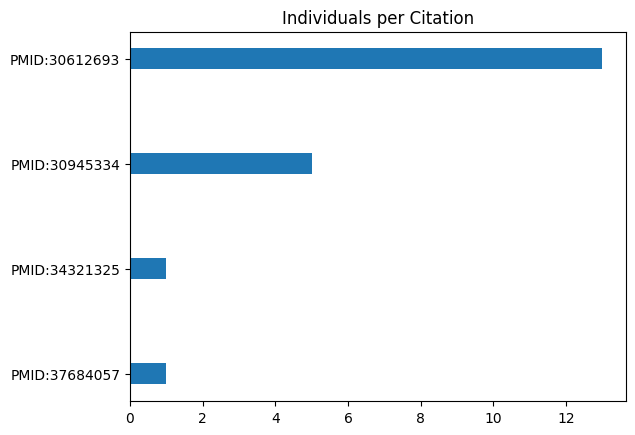

In [7]:
pcharts.pmid_barchart();

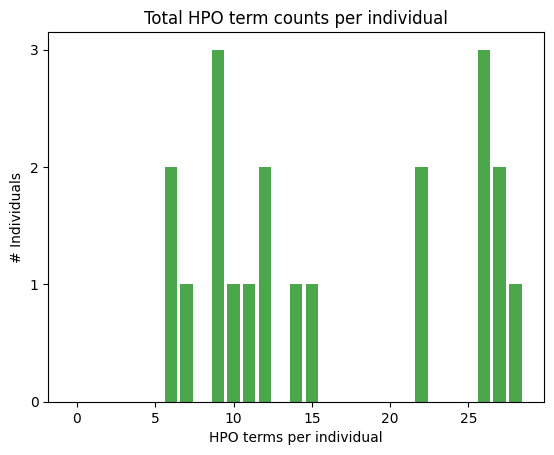

In [8]:
pcharts.terms_per_phenopacket();

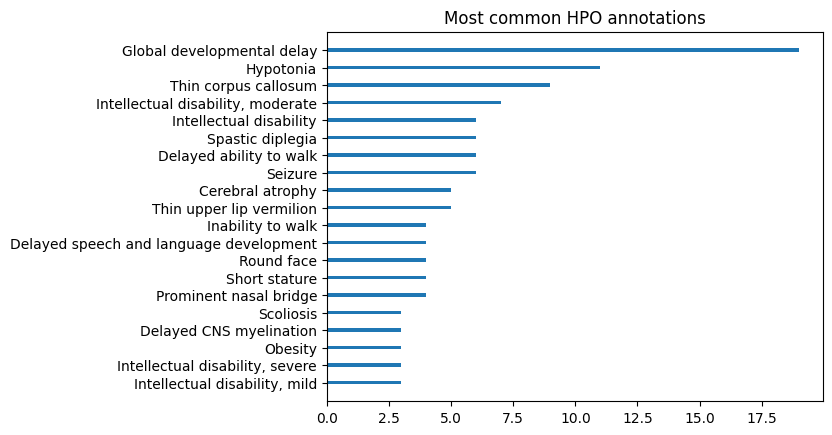

In [9]:
 pcharts.most_common_hpo_terms(20);